### Importing Libraries
---

In [1]:
# installing innvestigate library
!pip install innvestigate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 12.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.5 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492024 sha256=261680a571d56006b7447e6aa9c807af97ae2066ba1f87fa2dc27d632b8cd204
  Stored in directory: /root/.cache/pip/wheels/5e/a9/47/f118e66afd12240e4662752cc22cefae5d97275623aa8ef57d
Successfully built future
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uni

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import innvestigate
import innvestigate.utils as iutils
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

tf.compat.v1.disable_eager_execution()

2024-03-24 17:17:36.509919: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 17:17:36.509977: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 17:17:36.510029: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



### Loading Dataset
---

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

11490434/11490434 [==============================] - 0s 0us/step


### Classifier Architecture & Training
---

In [4]:
# Define the neural network architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
53888/54000 [============================>.] - ETA: 0s - loss: 0.1942 - accuracy: 0.9414

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


54000/54000 [==============================] - 18s 331us/sample - loss: 0.1939 - accuracy: 0.9414 - val_loss: 0.0622 - val_accuracy: 0.9810
Epoch 2/5
54000/54000 [==============================] - 18s 332us/sample - loss: 0.0534 - accuracy: 0.9838 - val_loss: 0.0535 - val_accuracy: 0.9847
Epoch 3/5
54000/54000 [==============================] - 17s 319us/sample - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0369 - val_accuracy: 0.9888
Epoch 4/5
54000/54000 [==============================] - 18s 325us/sample - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 5/5
54000/54000 [==============================] - 17s 320us/sample - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0348 - val_accuracy: 0.9890
Test accuracy: 0.9906


---
# iNNvestigate Analysis
---

In [20]:
methodd = {
    "gradient": 'Gradient',
    "smoothgrad": 'SmoothGrad',
    "lrp.z": 'LRP',
    "deep_taylor.bounded": 'DeepTaylor',
    "integrated_gradients": 'IntegratedGradients',
    "input_t_gradient": "InputTimesGradient",
    "deconvnet": 'Deconvnet',
    "guided_backprop": 'GuidedBackprop',
}

In [6]:
# Stripping the softmax activation from the model
model_wo_sm = innvestigate.model_wo_softmax(model)

# Define the analyzer methods
analyzer_methods = [
    ("gradient", {}),
    ("smoothgrad", {"noise_scale": 0.1}),
    ("lrp.z", {}),
    ("deep_taylor.bounded", {"low": -1, "high": 1}),
    ("integrated_gradients", {}),
    ("input_t_gradient", {}),
    ("deconvnet", {}),
    ("guided_backprop", {})
]

# Analyze model predictions
def analyze_prediction(model, analyzer_methods, data):
    analysis = {}
    for method in analyzer_methods:
        analyzer = innvestigate.create_analyzer(method[0], model, **method[1])
        analysis[method[0]] = analyzer.analyze(data)
    return analysis

# Select a random sample from the test set
sample_index = np.random.randint(0, len(X_test))
sample_image = X_test[sample_index].reshape(1, 28, 28, 1)
sample_label = np.argmax(y_test[sample_index])

# Convert the input data to a TensorFlow tensor
sample_image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)

# Analyze the sample image
analysis = analyze_prediction(model_wo_sm, analyzer_methods, sample_image)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


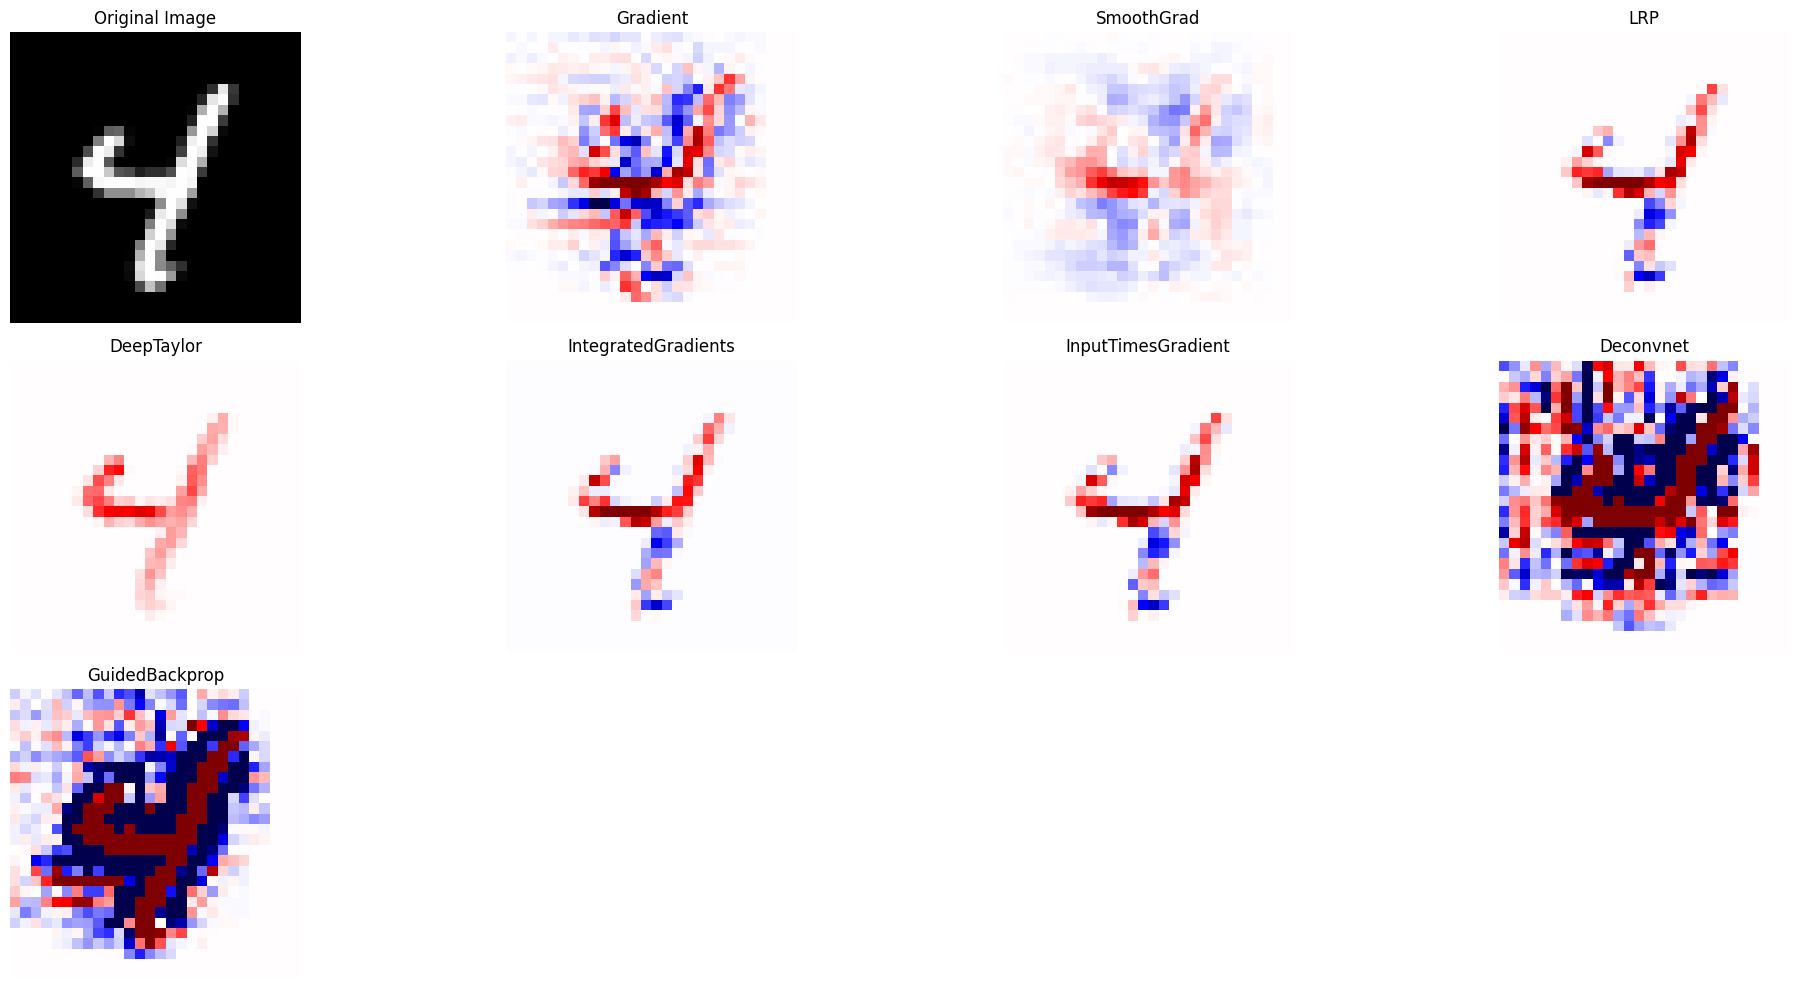

In [21]:
# Plot the results
plt.figure(figsize=(20, 10))
plt.subplot(3, 4, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, method in enumerate(analysis.keys()):
    plt.subplot(3, 4, i + 2)
    plt.imshow(analysis[method][0], cmap='seismic', vmin=-1, vmax=1)
    plt.title(methodd[method])
    plt.axis('off')

plt.tight_layout()
plt.show()

---
# iNNvestigate Neuron Selection
---

In [8]:
num_output_neurons = 10

In [9]:
# Analyze model predictions for a specific output neuron
def analyze_prediction(model, analyzer_methods, data, neuron_index):
    analysis = {}
    for method in analyzer_methods:
        analyzer = innvestigate.create_analyzer(method[0], model, neuron_selection_mode="index", **method[1])
        analysis[method[0]] = analyzer.analyze(data, neuron_selection=neuron_index)
    return analysis
    
# Analyze model predictions for all output neurons
def analyze_predictions_all_neurons(model, analyzer_methods, data):
    num_output_neurons = model.layers[-1].output_shape[-1]
    all_analysis = {}
    for neuron_index in range(num_output_neurons):
        analysis = analyze_prediction(model, analyzer_methods, data, neuron_index)
        all_analysis[neuron_index] = analysis
    return all_analysis

# Analyze the sample image for all output neurons
all_analysis = analyze_predictions_all_neurons(model_wo_sm, analyzer_methods, sample_image)

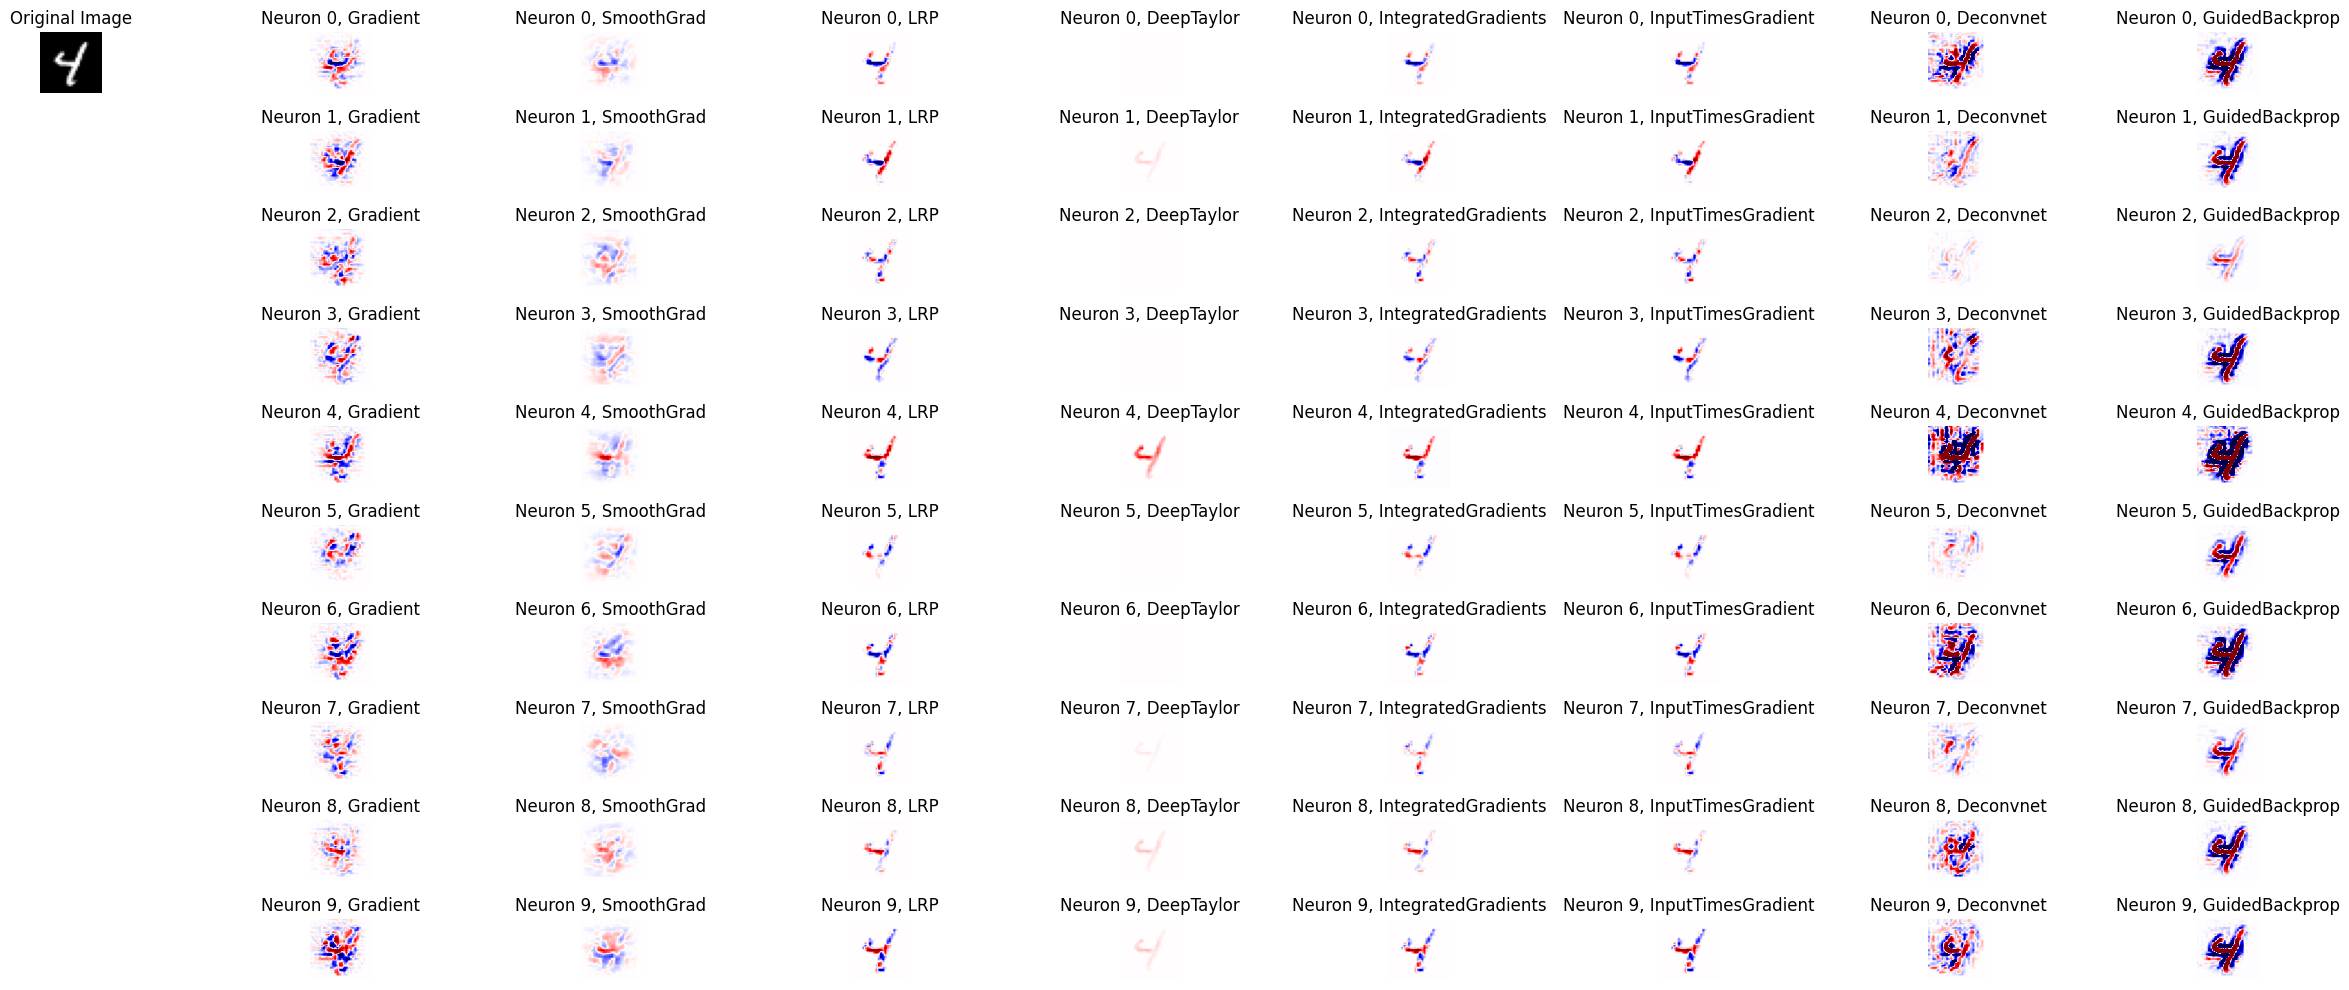

In [22]:
# Plot the results for each output neuron
plt.figure(figsize=(25, 10))

# Plot the original image
plt.subplot(num_output_neurons, len(analyzer_methods) + 1, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot the analysis results for each output neuron
for neuron_index in range(num_output_neurons):
    for i, method in enumerate(analyzer_methods):
        subplot_index = neuron_index * (len(analyzer_methods) + 1) + i + 2
        plt.subplot(num_output_neurons, len(analyzer_methods) + 1, subplot_index)
        plt.imshow(all_analysis[neuron_index][method[0]][0], cmap='seismic', vmin=-1, vmax=1)
        plt.title(f"Neuron {neuron_index}, {methodd[method[0]]}")
        plt.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

---